### About Dataset

This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

**Key Features**
1. `Brand`: Name of the car manufacturer
2. `Year`: Year of manufacture or release
3. `Model`: Name or code of the car model
4. `Car/Suv`: Type of the car (car or suv)
5. `Title`: Title or description of the car
6. `UsedOrNew`: Condition of the car (used or new)
7. `Transmission`: Type of transmission (manual or automatic)
8. `Engine`: Engine capacity or power (in litres or kilowatts)
9. `DriveType`: Type of drive (front-wheel, rear-wheel, or all-wheel)
10. `FuelType`: Type of fuel (petrol, diesel, hybrid, or electric)
11. `FuelConsumption`: Fuel consumption rate (in litres per 100 km)
12. `Kilometres`: Distance travelled by the car (in kilometres)
13. `ColourExtInt`: Colour of the car (exterior and interior)
14. `Location`: Location of the car (city and state)
15. `CylindersinEngine`: Number of cylinders in the engine
16. `BodyType`: Shape or style of the car body (sedan, hatchback, coupe, etc.)
17. `Doors`: Number of doors in the car
18. `Seats`: Number of seats in the car
19. `Price`: Price of the car (in Australian dollars)

Source: https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices

### Default Parameter

In [1005]:
filename = "Australian Vehicle Prices.csv"
target="Price"

### Load Dataset

In [1006]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv(filename, header=True, inferSchema=True, sep=',')
df.show(10)

+-------------+----+------+--------------------+--------------------+---------+------------+------------+---------+--------+---------------+----------+-------------+-------------------+-----------------+----------+--------+--------+------+
|        Brand|Year| Model|             Car/Suv|               Title|UsedOrNew|Transmission|      Engine|DriveType|FuelType|FuelConsumption|Kilometres| ColourExtInt|           Location|CylindersinEngine|  BodyType|   Doors|   Seats| Price|
+-------------+----+------+--------------------+--------------------+---------+------------+------------+---------+--------+---------------+----------+-------------+-------------------+-----------------+----------+--------+--------+------+
|    Ssangyong|2022|Rexton|Sutherland Isuzu Ute|2022 Ssangyong Re...|     DEMO|   Automatic|4 cyl, 2.2 L|      AWD|  Diesel| 8.7 L / 100 km|      5595|White / Black|     Caringbah, NSW|            4 cyl|       SUV| 4 Doors| 7 Seats| 51990|
|           MG|2022|   MG3|           Ha

### Length of the data

In [1007]:
df.count()

16825

### Describe Data

In [1008]:
df.describe().toPandas()

,summary,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,count,16824,16825,16824,16770,16642,16643,16733,16642,16642,16642,16642,16642,16642,16193,16643,16416,15130,15029,16640
1,mean,None,NaN,286.2518089725036,NaN,None,NaN,42013.71428571428,None,None,None,None,100330.99875474753,None,None,NaN,None,None,None,37279.494667711035
2,stddev,None,NaN,672.2551126621098,NaN,None,None,21223.543483350582,None,None,None,None,78211.75634676563,None,None,None,None,None,None,37240.08735871523
3,min,""",2000 Nissan Juke JUKE STL 2WD AUTO,NEW,-,-,O...","ACT""",-,02 **** ****,1940 Packard 120,DEMO,-,-,4WD,-,-,-,- / -,"Acacia Ridge, QLD",-,Commercial,12 Seats,11 Seats,100000
4,max,Volvo,nan,ZST,western auto wholesales,2023 Volvo Xc 90 Recharge Ultimate T8 Geartron...,nan,POA,"8 cyl, 7.3 L",Rear,Unleaded,9.9 L / 100 km,99999,Yellow / Slate,"Zetland, NSW",nan,Wagon,9 Seats,9 Seats,POA


Based on the summary statistics provided, it's evident that the dataset contains various types of data quality issues and inconsistencies that need to be addressed before drawing any meaningful conclusions. The data cleaning and preparation process is necessary to ensure reliable analysis. Some notable observations include:

1. **Missing Values**: Multiple columns such as 'Brand', 'Year', 'Model', 'Car/Suv', 'Title', and others exhibit missing values, which require handling through imputation or elimination strategies.
2. **Data Inconsistencies**: There are inconsistencies in the entries, for instance, 'Title' contains diverse and irregular descriptions, 'UsedOrNew' has 'DEMO' values, and 'Location' includes diverse location formats.
3. **Data Types**: Some columns seem to have mixed data types or unexpected values. For instance, 'Transmission' includes '-' entries, 'Engine' has mixed string and numeric values, and 'Price' possibly contains non-numeric entries such as 'POA' (Price on Application).

### Check Data Types of Each Column

In [1009]:
df.columns

['Brand',
 'Year',
 'Model',
 'Car/Suv',
 'Title',
 'UsedOrNew',
 'Transmission',
 'Engine',
 'DriveType',
 'FuelType',
 'FuelConsumption',
 'Kilometres',
 'ColourExtInt',
 'Location',
 'CylindersinEngine',
 'BodyType',
 'Doors',
 'Seats',
 'Price']

In [1010]:
df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Car/Suv: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- UsedOrNew: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- DriveType: string (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- FuelConsumption: string (nullable = true)
 |-- Kilometres: string (nullable = true)
 |-- ColourExtInt: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- CylindersinEngine: string (nullable = true)
 |-- BodyType: string (nullable = true)
 |-- Doors: string (nullable = true)
 |-- Seats: string (nullable = true)
 |-- Price: string (nullable = true)



The schema presented indicates that all columns in the dataset are identified as strings. This could be misleading as certain columns, such as 'Year', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', and 'Price', typically contain numerical data. Therefore, this situation suggests that the data types are not correctly inferred during the schema definition.

To resolve this issue, it's crucial to perform data type conversions for the columns with numerical values. For instance, columns like 'Year', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', and 'Price' should be converted from strings to their respective numeric types (integer or float) for accurate analysis, modeling, and interpretation of the data. This conversion ensures that mathematical operations and analytical techniques can be correctly applied to these numerical columns.

### Check Missing Values

In [1011]:
def count_missing_values(df):
    missing_values_count = {col: df.filter(df[col].isNull() | (df[col] == '')).count() for col in df.columns}
    return missing_values_count

missing_values = count_missing_values(df)

for col, count in missing_values.items():
    print(f"Kolom '{col}': {count} missing values")

Kolom 'Brand': 1 missing values
Kolom 'Year': 0 missing values
Kolom 'Model': 1 missing values
Kolom 'Car/Suv': 55 missing values
Kolom 'Title': 183 missing values
Kolom 'UsedOrNew': 182 missing values
Kolom 'Transmission': 92 missing values
Kolom 'Engine': 183 missing values
Kolom 'DriveType': 183 missing values
Kolom 'FuelType': 183 missing values
Kolom 'FuelConsumption': 183 missing values
Kolom 'Kilometres': 183 missing values
Kolom 'ColourExtInt': 183 missing values
Kolom 'Location': 632 missing values
Kolom 'CylindersinEngine': 182 missing values
Kolom 'BodyType': 409 missing values
Kolom 'Doors': 1695 missing values
Kolom 'Seats': 1796 missing values
Kolom 'Price': 185 missing values



- 'Brand', 'Model': Each has 1 missing value.
- 'Year': No missing values.
- 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'CylindersinEngine', 'BodyType', 'Price': Various counts of missing values ranging from 55 to 632.
- 'Location', 'Doors', 'Seats': Exhibit higher counts of missing values, particularly 'Doors' and 'Seats' with 1695 and 1796 missing values respectively.

The dataset displays diverse counts of missing values across different columns. While some columns only have a few missing values, others like 'Doors' and 'Seats' exhibit a higher prevalence of missing data, potentially affecting data analysis and completeness in these particular attributes.

### Data Cleaning and Manipulation + EDA

### Brand

In [1012]:
df.groupBy('Brand').count().orderBy('count').show(10)

+--------------------+-----+
|               Brand|count|
+--------------------+-----+
|",2009 Toyota Cro...|    1|
|",2018 Honda Veze...|    1|
|",2022 Fiat 500 L...|    1|
|",2022 Fiat 500 L...|    1|
|",2019 Toyota Cam...|    1|
|            Polestar|    1|
|",2000 Nissan Qas...|    1|
|",2023 Mazda BT-5...|    1|
|",2023 Subaru Cro...|    1|
|",2023 Nissan X-T...|    1|
+--------------------+-----+
only showing top 10 rows



The 'Brand' column still contains messy and mixed-up data, often seen in unique entries with a count of only one, indicating rare occurrences. Typically, entries like these might result from data anomalies, including merging values from other columns or erroneous data input.

In [1013]:
df.groupBy('Brand').count().orderBy('count').filter('count = 2').show(10)

+-------------+-----+
|        Brand|count|
+-------------+-----+
|International|    2|
|     Caterham|    2|
|         Saab|    2|
|  Lamborghini|    2|
+-------------+-----+



 Upon closer inspection using the code provided, entries with a count of two or more have been cleaned and formatted properly. Hence, for entries with a count of one, implying rare or unique instances, we decided to drop them as they are considered outliers or potentially erroneous data points.

In [1014]:
from pyspark.sql.functions import col
brand_counts = df.groupBy('Brand').count()
filtered_brands = brand_counts.filter(col('count') > 1)
df = df.join(filtered_brands, 'Brand', 'inner').drop('count')
df.groupBy('Brand').count().orderBy('count').show(10)

+-------------+-----+
|        Brand|count|
+-------------+-----+
|International|    2|
|     Caterham|    2|
|         Saab|    2|
|  Lamborghini|    2|
|          BYD|    3|
|        Rover|    3|
|     Infiniti|    3|
|       Abarth|    3|
|        Lotus|    3|
|         Opel|    4|
+-------------+-----+
only showing top 10 rows



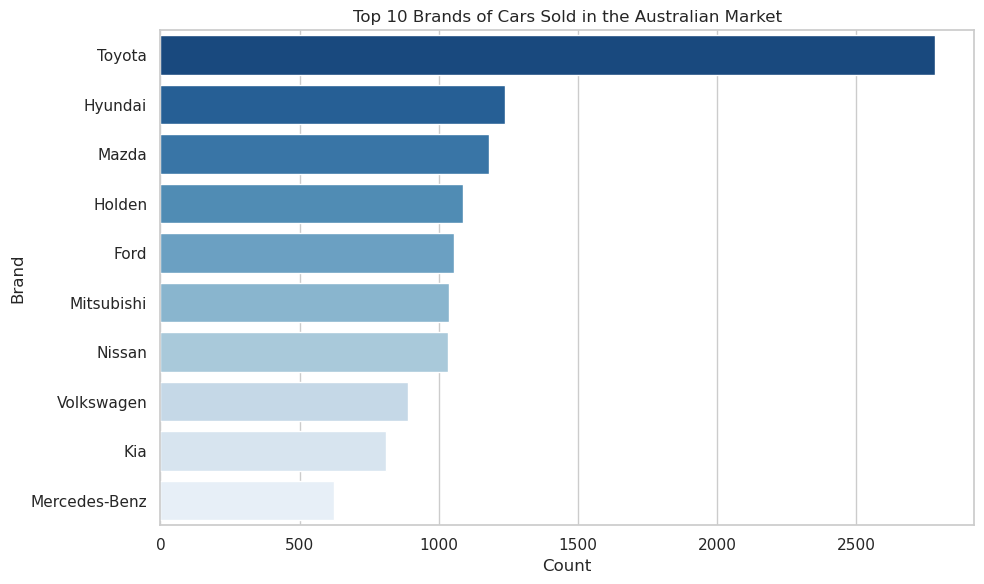

In [1015]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
brand_counts = df.groupBy('Brand').count().orderBy('count', ascending=False).limit(10)
pandas_df = brand_counts.toPandas()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Brand', data=pandas_df, hue='Brand', palette='Blues_r', dodge=False, legend=False)
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Top 10 Brands of Cars Sold in the Australian Market')
plt.tight_layout()
plt.show()

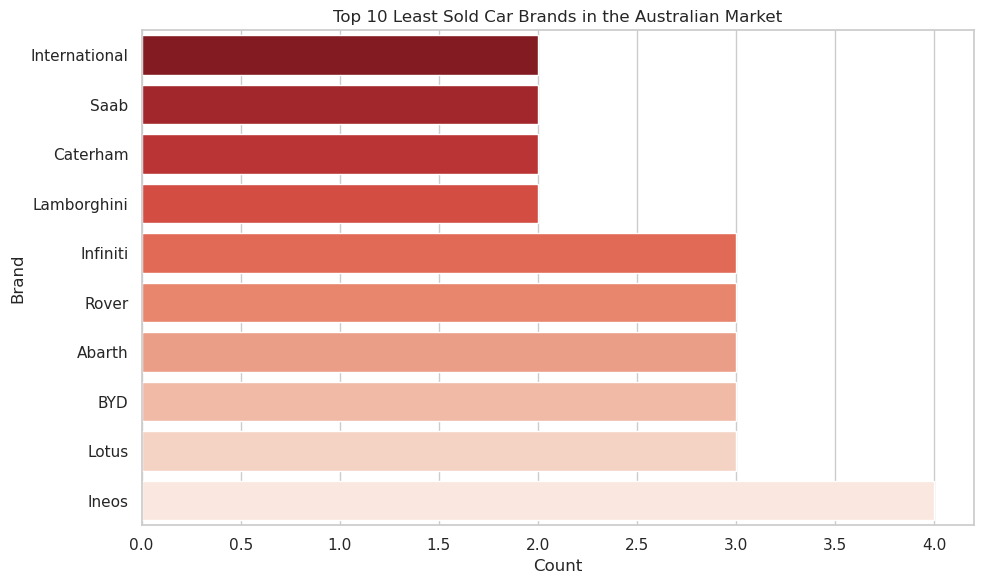

In [1016]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
brand_counts = df.groupBy('Brand').count().orderBy('count').limit(10)
pandas_df = brand_counts.toPandas()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Brand', data=pandas_df, hue='Brand', palette='Reds_r', dodge=False, legend=False)
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Top 10 Least Sold Car Brands in the Australian Market')
plt.tight_layout()
plt.show()

### Year

In [1017]:
df.groupBy('Year').count().orderBy('count', ascending = False).show(10)

+----+-----+
|Year|count|
+----+-----+
|2018| 1599|
|2019| 1480|
|2017| 1350|
|2022| 1328|
|2023| 1318|
|2020| 1135|
|2016| 1124|
|2021| 1098|
|2015| 1083|
|2014|  876|
+----+-----+
only showing top 10 rows



In [1018]:
df.groupBy('Year').count().orderBy('count').filter('count = 1').show(10)

+----+-----+
|Year|count|
+----+-----+
|1984|    1|
|1978|    1|
|1959|    1|
|1986|    1|
|1991|    1|
|1975|    1|
|1970|    1|
+----+-----+



In [1019]:
df = df.withColumn("Year", col("Year").cast("int"))
df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Car/Suv: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- UsedOrNew: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- DriveType: string (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- FuelConsumption: string (nullable = true)
 |-- Kilometres: string (nullable = true)
 |-- ColourExtInt: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- CylindersinEngine: string (nullable = true)
 |-- BodyType: string (nullable = true)
 |-- Doors: string (nullable = true)
 |-- Seats: string (nullable = true)
 |-- Price: string (nullable = true)



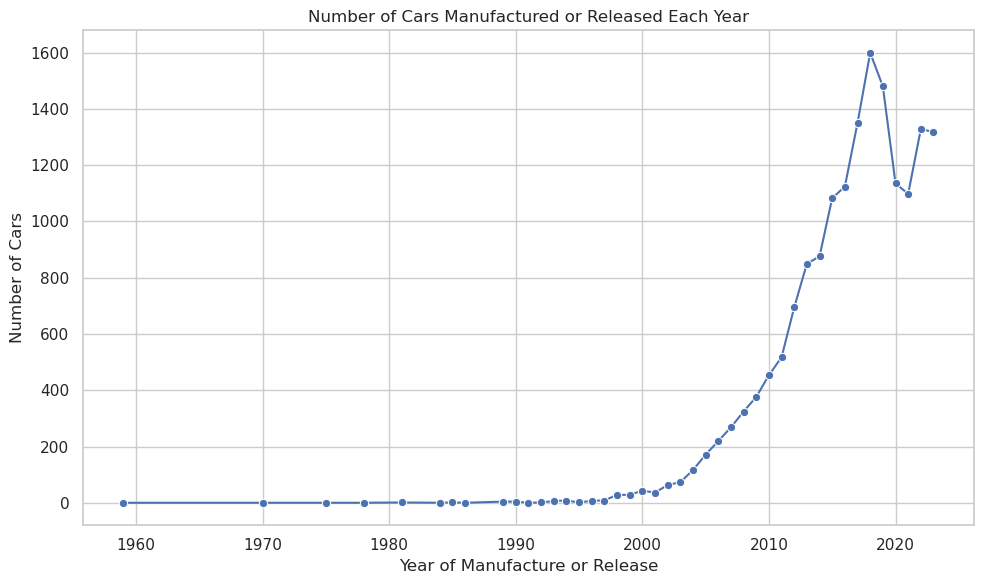

In [1020]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
year_counts = df.groupBy('Year').count().orderBy('Year').toPandas()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_counts, x='Year', y='count', marker='o')
plt.xlabel('Year of Manufacture or Release')
plt.ylabel('Number of Cars')
plt.title('Number of Cars Manufactured or Released Each Year')
plt.tight_layout()
plt.show()

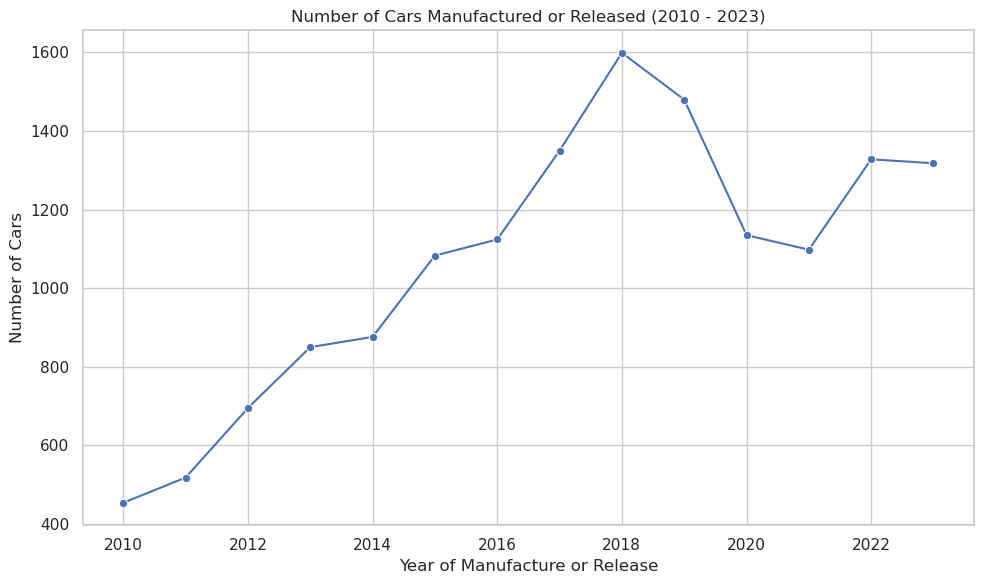

In [1021]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
year_counts = df.groupBy('Year').count().orderBy('Year').filter((df['Year'] >= 2010) & (df['Year'] <= 2023)).toPandas()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_counts, x='Year', y='count', marker='o')
plt.xlabel('Year of Manufacture or Release')
plt.ylabel('Number of Cars')
plt.title('Number of Cars Manufactured or Released (2010 - 2023)')
plt.tight_layout()
plt.show()

### Model

In [1022]:
df.groupBy('Model').count().orderBy('count', ascending = False).show(10)

+-----------+-----+
|      Model|count|
+-----------+-----+
|      Hilux|  430|
|    Corolla|  405|
|     Ranger|  398|
|Landcruiser|  370|
|        I30|  366|
|       RAV4|  344|
|     Triton|  304|
|  Commodore|  283|
|    X-Trail|  263|
|     Navara|  247|
+-----------+-----+
only showing top 10 rows



In [1023]:
df.groupBy('Model').count().orderBy('count').show(10)

+---------+-----+
|    Model|count|
+---------+-----+
|    Punto|    1|
|      SQ8|    1|
|      307|    1|
|      EQA|    1|
|    EQS53|    1|
|   Regius|    1|
| Fairmont|    1|
| GL-Class|    1|
|CLK-Class|    1|
|    Elise|    1|
+---------+-----+
only showing top 10 rows



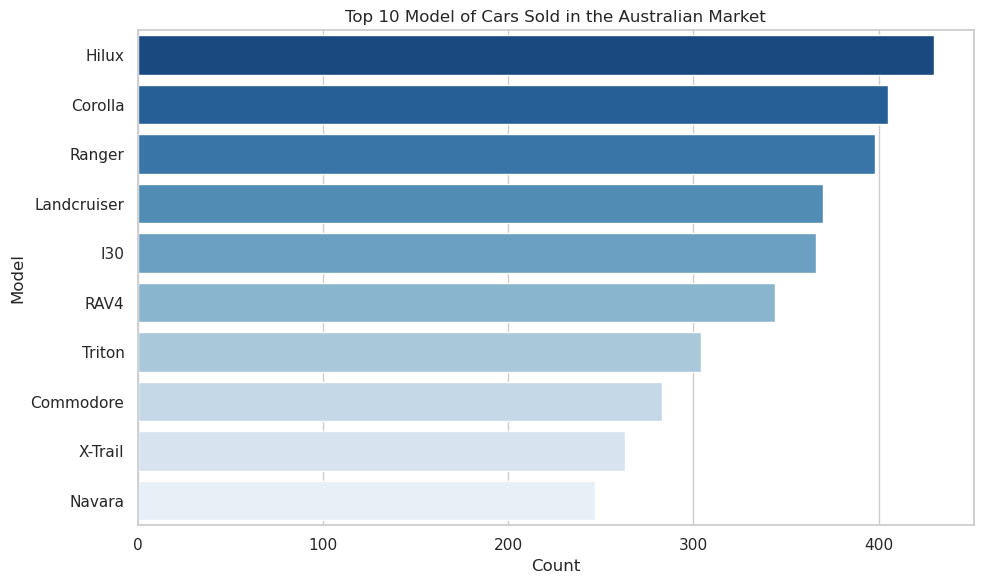

In [1024]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
brand_counts = df.groupBy('Model').count().orderBy('count', ascending=False).limit(10)
pandas_df = brand_counts.toPandas()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Model', data=pandas_df, hue='Model', palette='Blues_r', dodge=False, legend=False)
plt.xlabel('Count')
plt.ylabel('Model')
plt.title('Top 10 Model of Cars Sold in the Australian Market')
plt.tight_layout()
plt.show()

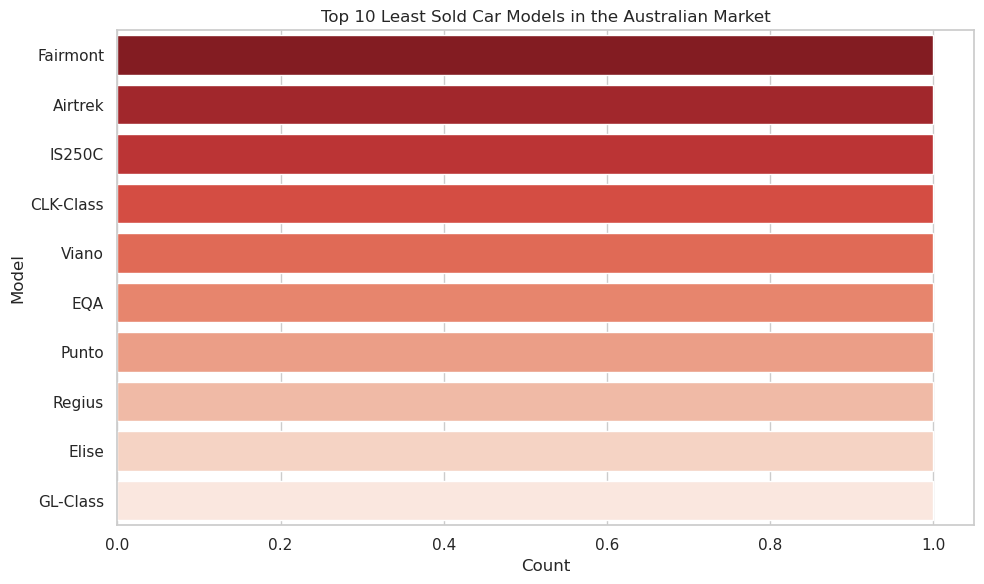

In [1025]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
brand_counts = df.groupBy('Model').count().orderBy('count').limit(10)
pandas_df = brand_counts.toPandas()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Model', data=pandas_df, hue='Model', palette='Reds_r', dodge=False, legend=False)
plt.xlabel('Count')
plt.ylabel('Model')
plt.title('Top 10 Least Sold Car Models in the Australian Market')
plt.tight_layout()
plt.show()

### Car/SUV

In [1026]:
df.groupBy('Car/Suv').count().orderBy('count', ascending = False).show(10)

+--------------------+-----+
|             Car/Suv|count|
+--------------------+-----+
|                 SUV| 5921|
|           Hatchback| 2365|
|          Ute / Tray| 2067|
|               Sedan| 1895|
|               Wagon|  577|
|NEW Available to ...|  435|
|      USED Dealer ad|  319|
|          Commercial|  305|
|               Coupe|  256|
|        NEW In stock|  118|
+--------------------+-----+
only showing top 10 rows



The presented column, aimed at categorizing the class between Car and SUV, has multiple distinct categories. For the purpose of simplification and to streamline further analysis and linear modeling, all categories except for 'SUV' were aggregated and relabeled as 'Car'. This step was taken to consolidate and generalize the broader classification for analytical purposes.

In [1027]:
from pyspark.sql.functions import when
df = df.withColumn('Car/Suv', when(df['Car/Suv'] != 'SUV', 'Car').otherwise(df['Car/Suv']))
df.groupBy('Car/Suv').count().orderBy('count', ascending = False).show(10)

+-------+-----+
|Car/Suv|count|
+-------+-----+
|    Car|10802|
|    SUV| 5921|
+-------+-----+



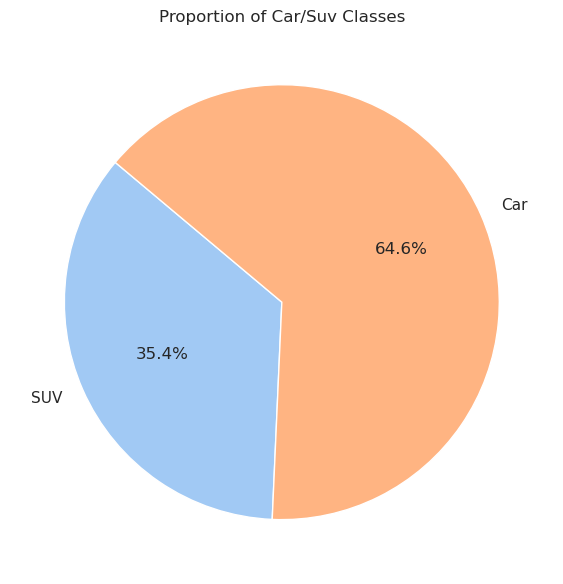

In [1028]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
car_counts = df.groupBy('Car/Suv').count().toPandas()
sns.set_theme()
plt.figure(figsize=(8, 6))
plt.pie(car_counts['count'], labels=car_counts['Car/Suv'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Car/Suv Classes')
plt.tight_layout()
plt.show()

### Title

In [1029]:
df.groupBy('Title').count().orderBy('count', ascending = False).show(10)

+--------------------+-----+
|               Title|count|
+--------------------+-----+
|                NULL|   90|
|2019 Hyundai I30 ...|   60|
|   2020 Kia Cerato S|   52|
|2020 Hyundai Kona...|   38|
|2020 Hyundai I30 ...|   35|
|2021 Toyota Corol...|   28|
|2018 Toyota Hilux...|   27|
|2018 Hyundai I30 ...|   26|
|2017 Toyota Hilux...|   25|
|2019 Toyota Hilux...|   22|
+--------------------+-----+
only showing top 10 rows



The considerable number of NULL values and the diverse nature of entries in the 'Title' column indicate its limited relevance for linear modeling. Due to the significant presence of NULLs and the varied entries, this column may not contribute substantially to the analysis. Hence, it might not warrant further exploration or detailed analysis for the purpose of linear modeling.

### UsedOrNew

In [1030]:
df.groupBy('UsedOrNew').count().orderBy('count', ascending = False).show(10)

+---------+-----+
|UsedOrNew|count|
+---------+-----+
|     USED|14936|
|      NEW| 1206|
|     DEMO|  491|
|     NULL|   90|
+---------+-----+



The categorization of 'DEMO' as 'NEW' could be justified based on two primary reasons. Firstly, 'DEMO' items might not have been officially sold to consumers, hence can be considered as new merchandise due to their lack of formal retail transactions. Secondly, despite being utilized for demonstration purposes, 'DEMO' products might retain a condition close to 'NEW' as they generally undergo minimal or limited usage, preserving their pristine or slightly-used state. Therefore, given the absence of consumer sales and their relatively untouched condition, classifying 'DEMO' under the 'NEW' category is justifiable as it aligns with the products' lack of substantial use or ownership by consumers.

Dropping the 'NULL' class is justifiable due to its minimal presence in the dataset and lack of meaningful information. With only a small number of instances, this category doesn’t significantly contribute to the analysis and lacks specific data, potentially introducing noise without providing valuable insights. Removing 'NULL' entries enhances dataset clarity, focusing on more significant data points, improving the quality and relevance of derived insights.

In [1031]:
from pyspark.sql.functions import when
df = df.withColumn('UsedOrNew', when(df['UsedOrNew'] == 'DEMO', 'NEW').otherwise(df['UsedOrNew'])).filter(df['UsedOrNew'] != 'NULL')
df.groupBy('UsedOrNew').count().orderBy('count', ascending = False).show(10)

+---------+-----+
|UsedOrNew|count|
+---------+-----+
|     USED|14936|
|      NEW| 1697|
+---------+-----+



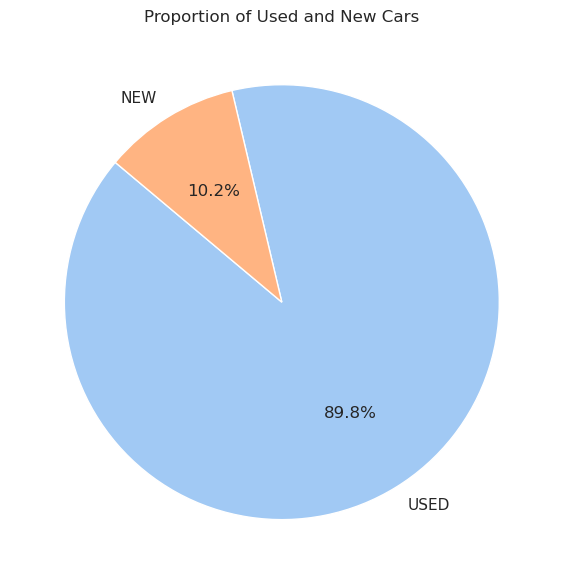

In [1032]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
used_new_counts = df.groupBy('UsedOrNew').count().orderBy('count', ascending=False).toPandas()
sns.set_theme()
plt.figure(figsize=(8, 6))
plt.pie(used_new_counts['count'], labels=used_new_counts['UsedOrNew'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Used and New Cars')
plt.tight_layout()
plt.show()

### Transmission

In [1033]:
df.groupBy('Transmission').count().orderBy('count', ascending = False).show(10)

+------------+-----+
|Transmission|count|
+------------+-----+
|   Automatic|14522|
|      Manual| 1945|
|           -|  166|
+------------+-----+



For the class '-', we consider it as incomplete or missing information, akin to null values. Given the very low count, we've opted to drop this specific value as it could potentially disrupt or skew the analysis due to its sparse representation in the dataset.

In [1034]:
df = df.filter(df['Transmission'] != '-')
df.groupBy('Transmission').count().orderBy('count', ascending = False).show(10)

+------------+-----+
|Transmission|count|
+------------+-----+
|   Automatic|14522|
|      Manual| 1945|
+------------+-----+



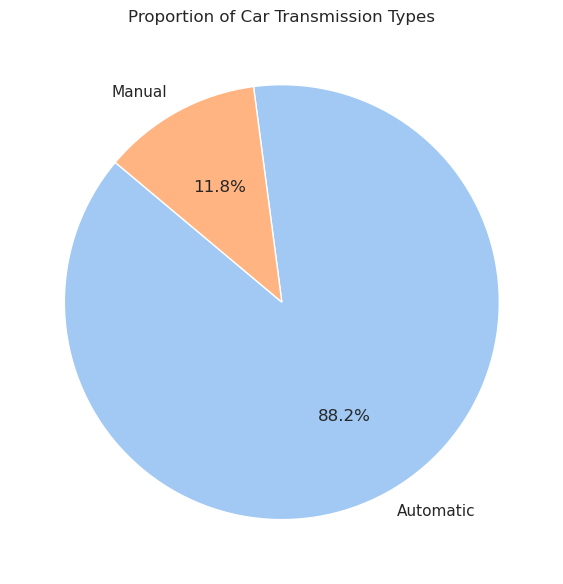

In [1035]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
transmission_counts = df.groupBy('Transmission').count().orderBy('count', ascending=False).toPandas()
sns.set_theme()
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts['count'], labels=transmission_counts['Transmission'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Car Transmission Types')
plt.tight_layout()
plt.show()

### Engine

In [1036]:
df.groupBy('Engine').count().orderBy('count', ascending = False).show(10)

+------------+-----+
|      Engine|count|
+------------+-----+
|  4 cyl, 2 L| 3931|
|4 cyl, 2.5 L| 1630|
|           -| 1459|
|4 cyl, 2.4 L|  830|
|  6 cyl, 3 L|  712|
|4 cyl, 1.8 L|  704|
|4 cyl, 1.5 L|  693|
|4 cyl, 2.8 L|  593|
|4 cyl, 1.6 L|  560|
|  4 cyl, 3 L|  556|
+------------+-----+
only showing top 10 rows



The data provided in the 'Engine' column seems to be a combination of 'Engine' and 'FuelConsumption' in a string format, making it challenging for further analysis. Transforming it into numerical data for predictive variables in linear modeling would require advanced data preprocessing. Hence, we've decided to exclude this column from further analysis and disregard its use.

### DriveType

In [1037]:
df.groupBy('DriveType').count().orderBy('count', ascending = False).show(10)

+---------+-----+
|DriveType|count|
+---------+-----+
|    Front| 6947|
|      4WD| 3142|
|      AWD| 3090|
|     Rear| 2345|
|    Other|  943|
+---------+-----+



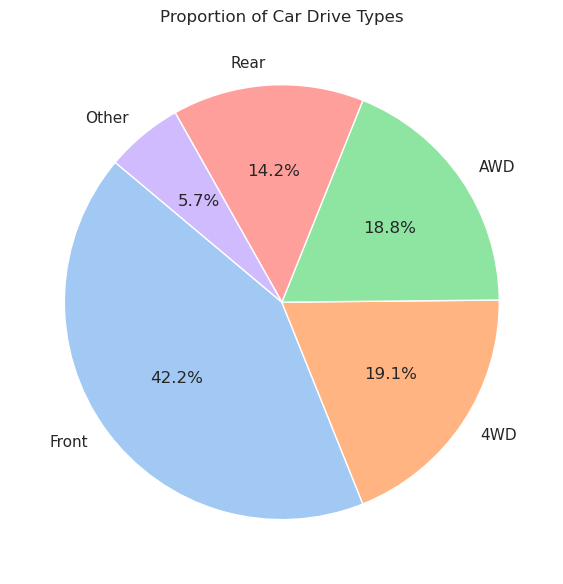

In [1038]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
drive_type_counts = df.groupBy('DriveType').count().orderBy('count', ascending=False).toPandas()
sns.set_theme()
plt.figure(figsize=(8, 6))
plt.pie(drive_type_counts['count'], labels=drive_type_counts['DriveType'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Car Drive Types')
plt.tight_layout()
plt.show()

### FuelType

In [1039]:
df.groupBy('FuelType').count().orderBy('count', ascending = False).show(10)

+--------+-----+
|FuelType|count|
+--------+-----+
|Unleaded| 6929|
|  Diesel| 4893|
| Premium| 3353|
|  Hybrid|  637|
|       -|  492|
|Electric|  102|
|   Other|   41|
|     LPG|   15|
|  Leaded|    5|
+--------+-----+



In the given dataset, the classes '-', 'LPG', and 'Leaded' in the 'FuelType' column contain a relatively small number of instances and are less common compared to the major fuel types like Unleaded, Diesel, and Premium. Therefore, we decided to categorize these less frequent types into an 'Others' category to reduce the dimensions of the classes.

In [1040]:
from pyspark.sql.functions import when
df = df.withColumn('FuelType', when(df['FuelType'] == '-', 'Other')
                   .otherwise(when(df['FuelType'] == 'LPG', 'Other')
                   .otherwise(when(df['FuelType'] == 'Leaded', 'Other')
                   .otherwise(df['FuelType']))))
df.groupBy('FuelType').count().orderBy('count', ascending = False).show(10)

+--------+-----+
|FuelType|count|
+--------+-----+
|Unleaded| 6929|
|  Diesel| 4893|
| Premium| 3353|
|  Hybrid|  637|
|   Other|  553|
|Electric|  102|
+--------+-----+



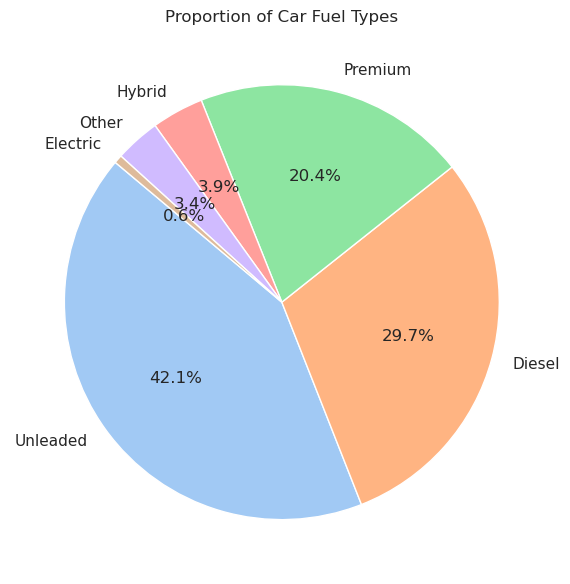

In [1041]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
fuel_type_counts = df.groupBy('FuelType').count().orderBy('count', ascending=False).toPandas()
sns.set_theme()
plt.figure(figsize=(8, 6))
plt.pie(fuel_type_counts['count'], labels=fuel_type_counts['FuelType'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Car Fuel Types')
plt.tight_layout()
plt.show()

### FuelConsumption

In [1042]:
df.groupBy('FuelConsumption').count().orderBy('count', ascending = False).show(10)

+---------------+-----+
|FuelConsumption|count|
+---------------+-----+
|              -| 1482|
| 7.4 L / 100 km|  708|
| 7.9 L / 100 km|  518|
| 7.3 L / 100 km|  476|
| 8.1 L / 100 km|  443|
| 7.5 L / 100 km|  404|
| 7.6 L / 100 km|  404|
| 7.2 L / 100 km|  402|
|   0 L / 100 km|  371|
|   8 L / 100 km|  367|
+---------------+-----+
only showing top 10 rows



The entries in the 'FuelConsumption' column appear to represent consumption rates in a string format, making it challenging to conduct further analysis directly. The reason is similar to the 'Engine' column, where the data needs to be preprocessed significantly to convert it into a numerical format suitable for predictive modeling. Hence, we decided not to use this column for further analysis due to its string format and the complexities involved in transforming it into a usable numerical form.

### Kilometres

In [1043]:
df.groupBy('Kilometres').count().orderBy('count', ascending = False).show(10)

+----------+-----+
|Kilometres|count|
+----------+-----+
|     - / -|  435|
|        10|  128|
|         -|  120|
|        15|   95|
|        20|   83|
|         7|   59|
|        22|   48|
|        25|   36|
|        11|   35|
|        12|   35|
+----------+-----+
only showing top 10 rows



In [1044]:
from pyspark.sql.functions import when
df = df.withColumn('Kilometres', when(df['Kilometres'] == '-', '0')
                   .otherwise(when(df['Kilometres'] == '- / -', '0')
                   .otherwise(df['Kilometres'])))
df.groupBy('Kilometres').count().orderBy('count', ascending = False).show(10)

+----------+-----+
|Kilometres|count|
+----------+-----+
|         0|  555|
|        10|  128|
|        15|   95|
|        20|   83|
|         7|   59|
|        22|   48|
|        25|   36|
|        11|   35|
|        12|   35|
|         5|   32|
+----------+-----+
only showing top 10 rows



In [1045]:
df = df.withColumn("Kilometres", col("Kilometres").cast("int"))
df.filter((df['Kilometres'] == 0)).select('Kilometres', 'UsedOrNew').show(10)

+----------+---------+
|Kilometres|UsedOrNew|
+----------+---------+
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
|         0|      NEW|
+----------+---------+
only showing top 10 rows



The values ' - / -' and '-' in the 'Kilometres' column represent vehicles that are categorized as 'NEW' and haven't been used yet. Therefore, converting these values to 0 kilometres is an appropriate action. This conversion aligns with the understanding that 'NEW' vehicles typically have no recorded mileage or have not yet been put into use. Consequently, setting these values to 0 kilometres accurately reflects the status of newly acquired vehicles that haven't undergone any mileage.

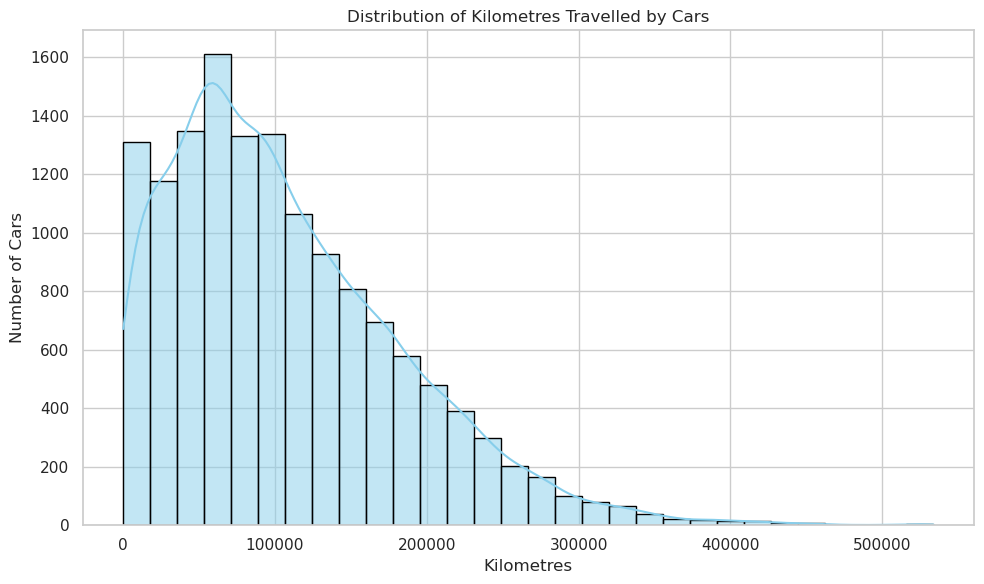

In [1046]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
kilometres_counts = df.groupBy('Kilometres').count().orderBy('count', ascending=False).toPandas()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(kilometres_counts['Kilometres'], bins=30, color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Kilometres')
plt.ylabel('Number of Cars')
plt.title('Distribution of Kilometres Travelled by Cars')
plt.grid(True)
plt.tight_layout()
plt.show()

A right-skewed histogram for `Kilometres` implies that most cars have relatively low mileage, while a few cars have significantly higher mileage. This suggests that the majority of cars tend to have shorter travel distances, with a smaller number of cars having traveled much farther. The skewed distribution indicates a concentration of cars with lower mileage and fewer cars with higher mileage. This insight could influence factors such as resale value, maintenance considerations, and potential buyer preferences in the used car market.

### ColourExtInt 

In [1047]:
df.groupBy('ColourExtInt').count().orderBy('count', ascending = False).show(10)

+--------------+-----+
|  ColourExtInt|count|
+--------------+-----+
|     White / -| 2778|
| White / Black| 1687|
|    Silver / -| 1092|
|      Grey / -|  929|
|     Black / -|  882|
|  Grey / Black|  769|
|      Blue / -|  701|
|Silver / Black|  674|
|  White / Grey|  663|
| Black / Black|  620|
+--------------+-----+
only showing top 10 rows



The 'ColourExtInt' column records combinations of exterior and interior colors of the cars. However, this information might not significantly influence predictive modeling or analysis, particularly regarding pricing, as color preferences are subjective and do not directly impact a car's value or features. Therefore, we consider this data less relevant for further analysis.

### Location

In [1048]:
df.groupBy('Location').count().orderBy('count', ascending = False).show(10)

+--------------------+-----+
|            Location|count|
+--------------------+-----+
|    Minchinbury, NSW|  543|
|                NULL|  435|
|      Blacktown, NSW|  295|
|      Liverpool, NSW|  251|
|Hoppers Crossing,...|  227|
|       Ringwood, VIC|  215|
|         Bentley, WA|  210|
|         Wangara, WA|  203|
|        Berwick, VIC|  195|
|        Cardiff, NSW|  195|
+--------------------+-----+
only showing top 10 rows



The 'Location' column contains information about the geographical location of the vehicles. However, this data might not be significantly relevant for predictive modeling or analyses related to car pricing or features. Geographical location, while important in some contexts, does not directly impact the vehicle's value or characteristics. Therefore, we consider this data less influential for further analysis.




### CylindersinEngine

In [1049]:
df.groupBy('CylindersinEngine').count().orderBy('count', ascending = False).show(10)

+-----------------+-----+
|CylindersinEngine|count|
+-----------------+-----+
|            4 cyl|11471|
|            6 cyl| 2088|
|                -| 1459|
|            8 cyl|  604|
|            5 cyl|  399|
|            3 cyl|  324|
|              0 L|  100|
|           12 cyl|   15|
|            2 cyl|    4|
|           10 cyl|    3|
+-----------------+-----+



We decided to extract only the numerical values from the 'CylindersinEngine' column and remove the 'cyl' string. This allows us to convert the column into a numeric format suitable for further analysis and modeling purposes. The string format with 'cyl' suffix does not facilitate numerical computations, so by transforming it into a purely numerical representation, we aim to use this data more effectively for modeling and analysis.

In [1050]:
from pyspark.sql.functions import regexp_extract
df = df.filter(df['CylindersinEngine'] != '-') \
    .withColumn('CylindersinEngine', regexp_extract('CylindersinEngine', r'(\d+)', 1))
df.groupBy('CylindersinEngine').count().orderBy('count', ascending = False).show(10)

+-----------------+-----+
|CylindersinEngine|count|
+-----------------+-----+
|                4|11471|
|                6| 2088|
|                8|  604|
|                5|  399|
|                3|  324|
|                0|  100|
|               12|   15|
|                2|    4|
|               10|    3|
+-----------------+-----+



In [1051]:
df = df.withColumn("CylindersinEngine", col("CylindersinEngine").cast("int"))
df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Car/Suv: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- UsedOrNew: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- DriveType: string (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- FuelConsumption: string (nullable = true)
 |-- Kilometres: integer (nullable = true)
 |-- ColourExtInt: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- CylindersinEngine: integer (nullable = true)
 |-- BodyType: string (nullable = true)
 |-- Doors: string (nullable = true)
 |-- Seats: string (nullable = true)
 |-- Price: string (nullable = true)



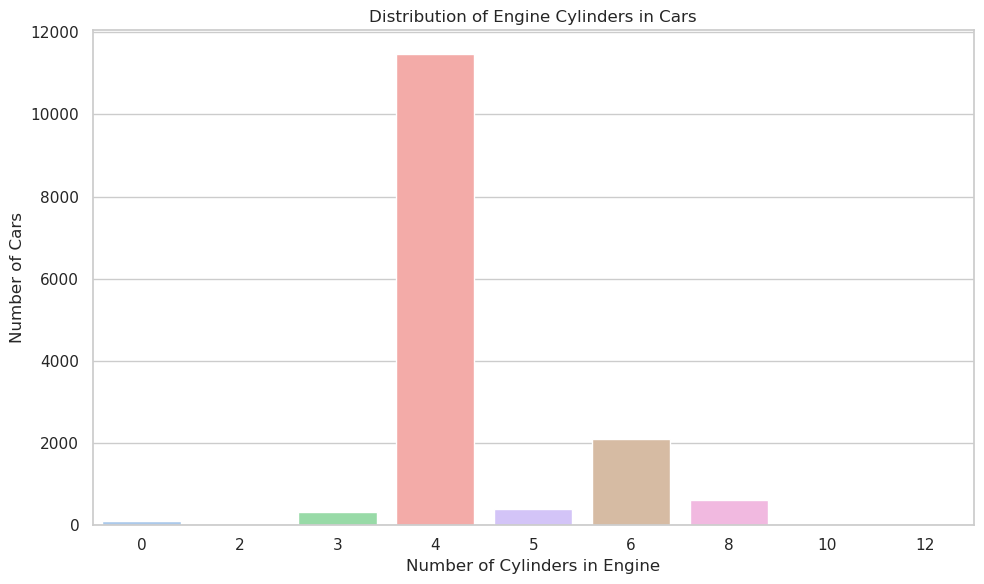

In [1052]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cylinder_counts = df.groupBy('CylindersinEngine').count().orderBy('count', ascending=False).toPandas()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='CylindersinEngine', y='count', data=cylinder_counts, hue='CylindersinEngine', dodge=False, palette='pastel', legend=False)
plt.xlabel('Number of Cylinders in Engine')
plt.ylabel('Number of Cars')
plt.title('Distribution of Engine Cylinders in Cars')
plt.tight_layout()
plt.show()

### BodyType

In [1053]:
df.groupBy('BodyType').count().orderBy('count', ascending = False).show(10)

+------------+-----+
|    BodyType|count|
+------------+-----+
|         SUV| 6805|
|   Hatchback| 2469|
|  Ute / Tray| 2301|
|       Sedan| 1968|
|       Wagon|  630|
|  Commercial|  399|
|       Coupe|  279|
| Convertible|  117|
|People Mover|   21|
|       Other|   19|
+------------+-----+



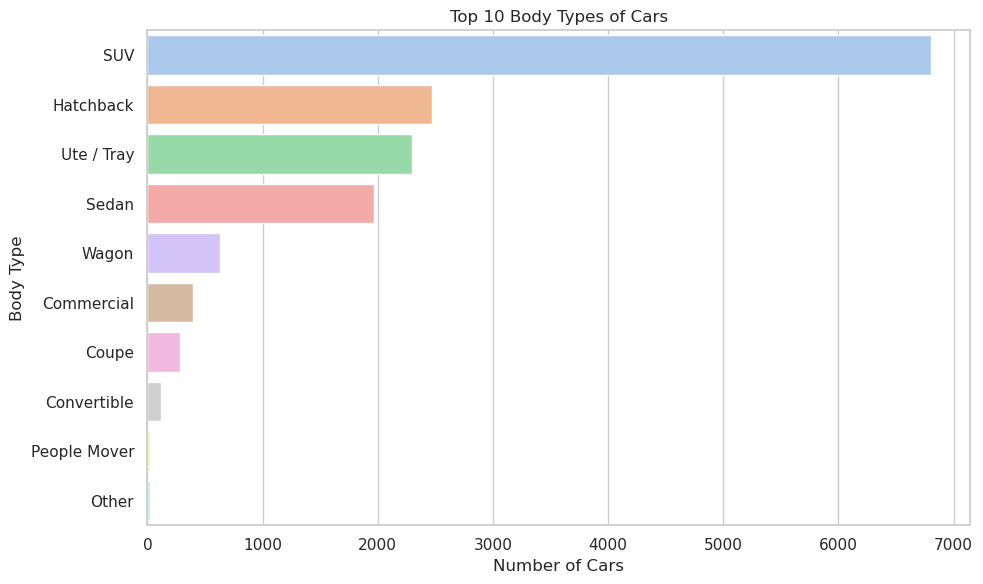

In [1054]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
body_type_counts = df.groupBy('BodyType').count().orderBy('count', ascending=False).limit(10).toPandas()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='BodyType', data=body_type_counts, hue='BodyType', dodge=False, palette='pastel', legend=False)
plt.xlabel('Number of Cars')
plt.ylabel('Body Type')
plt.title('Top 10 Body Types of Cars')
plt.tight_layout()
plt.show()

### Doors

In [1055]:
df.groupBy('Doors').count().orderBy('count', ascending = False).show(10)

+--------+-----+
|   Doors|count|
+--------+-----+
| 4 Doors|11156|
| 5 Doors| 2524|
| 2 Doors| 1116|
| 3 Doors|  212|
+--------+-----+



Similarly, for the 'Doors' column, we intend to extract only the numeric values from the strings ('4 Doors', '5 Doors', etc.) and remove the non-numeric parts. This transformation will enable us to convert the column into a purely numerical format suitable for analytical purposes and modeling, as the string format does not facilitate numerical computations. This way, the 'Doors' information will be represented in a more standardized numeric format, enhancing its usability for analysis and modeling purposes.

In [1056]:
from pyspark.sql.functions import regexp_extract
df = df.withColumn('Doors', regexp_extract('Doors', r'(\d+)', 1))
df.groupBy('Doors').count().orderBy('count', ascending = False).show(10)

+-----+-----+
|Doors|count|
+-----+-----+
|    4|11156|
|    5| 2524|
|    2| 1116|
|    3|  212|
+-----+-----+



In [1057]:
df = df.withColumn("Doors", col("Doors").cast("int"))
df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Car/Suv: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- UsedOrNew: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- DriveType: string (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- FuelConsumption: string (nullable = true)
 |-- Kilometres: integer (nullable = true)
 |-- ColourExtInt: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- CylindersinEngine: integer (nullable = true)
 |-- BodyType: string (nullable = true)
 |-- Doors: integer (nullable = true)
 |-- Seats: string (nullable = true)
 |-- Price: string (nullable = true)



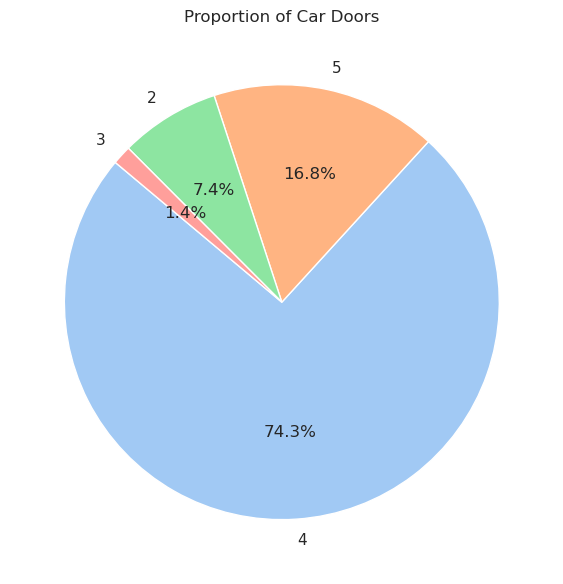

In [1058]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
doors_counts = df.groupBy('Doors').count().orderBy('count', ascending=False).limit(10).toPandas()
sns.set_theme()
plt.figure(figsize=(8, 6))
plt.pie(doors_counts['count'], labels=doors_counts['Doors'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Car Doors')
plt.tight_layout()
plt.show()

### Seats

In [1059]:
df.groupBy('Seats').count().orderBy('count', ascending = False).show(10)

+---------+-----+
|    Seats|count|
+---------+-----+
|  5 Seats|11276|
|  7 Seats| 1791|
|  4 Seats|  665|
|  2 Seats|  592|
|  3 Seats|  327|
|  8 Seats|  272|
|  6 Seats|   30|
|     NULL|   30|
| 14 Seats|   12|
| 12 Seats|    4|
+---------+-----+
only showing top 10 rows



Similarly, for the 'Seats' column, we aim to transform the string values ('5 Seats', '7 Seats', etc.) into numerical values by extracting only the numeric information and discarding the non-numeric part. This conversion will enable us to utilize the 'Seats' column in a numeric format, which is more compatible with analysis and modeling tasks. The string format does not lend itself well to numerical calculations, hence converting it to a purely numerical representation is essential for better analytical insights and modeling accuracy.

In [1060]:
from pyspark.sql.functions import regexp_extract
df = df.filter(df['Seats'] != 'NULL') \
    .withColumn('Seats', regexp_extract('Seats', r'(\d+)', 1))
df.groupBy('Seats').count().orderBy('count', ascending = False).show(10)

+-----+-----+
|Seats|count|
+-----+-----+
|    5|11276|
|    7| 1791|
|    4|  665|
|    2|  592|
|    3|  327|
|    8|  272|
|    6|   30|
|   14|   12|
|   12|    4|
|   11|    3|
+-----+-----+
only showing top 10 rows



In [1061]:
df = df.withColumn("Seats", col("Seats").cast("int"))
df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Car/Suv: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- UsedOrNew: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- DriveType: string (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- FuelConsumption: string (nullable = true)
 |-- Kilometres: integer (nullable = true)
 |-- ColourExtInt: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- CylindersinEngine: integer (nullable = true)
 |-- BodyType: string (nullable = true)
 |-- Doors: integer (nullable = true)
 |-- Seats: integer (nullable = true)
 |-- Price: string (nullable = true)



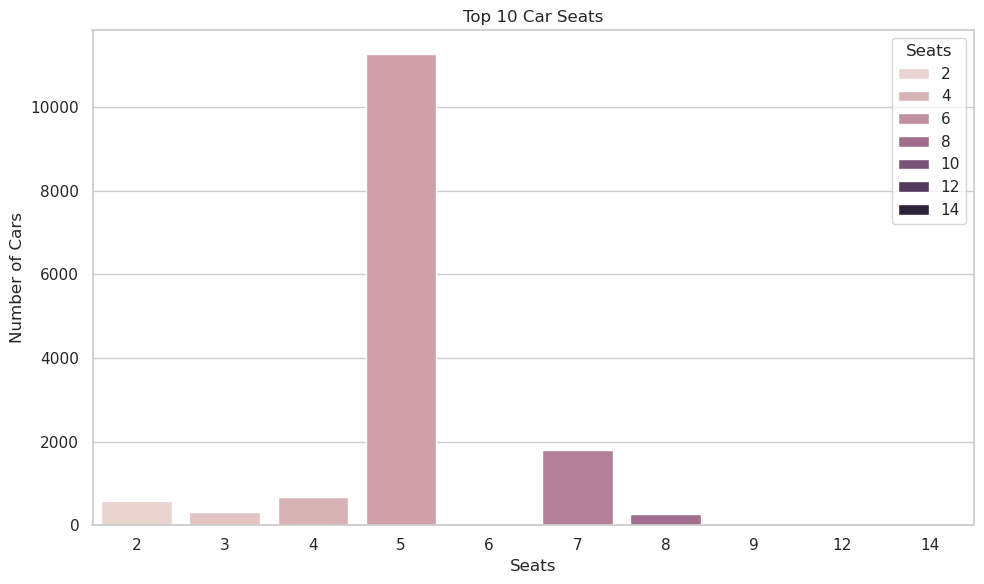

In [1062]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
seats_counts = df.groupBy('Seats').count().orderBy('count', ascending=False).limit(10).toPandas()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Seats', y='count', data=seats_counts, hue='Seats', dodge=False)
plt.xlabel('Seats')
plt.ylabel('Number of Cars')
plt.title('Top 10 Car Seats')
plt.tight_layout()
plt.show()

### Price

In [1063]:
df.groupBy('Price').count().orderBy('count', ascending = False).show(10)

+-----+-----+
|Price|count|
+-----+-----+
|29990|  233|
|19990|  226|
|24990|  192|
|26990|  177|
|27990|  165|
|34990|  160|
|22990|  160|
|39990|  156|
|12990|  153|
|28990|  151|
+-----+-----+
only showing top 10 rows



In [1064]:
df = df.withColumn("Price", col("Price").cast("int"))
df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Car/Suv: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- UsedOrNew: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- DriveType: string (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- FuelConsumption: string (nullable = true)
 |-- Kilometres: integer (nullable = true)
 |-- ColourExtInt: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- CylindersinEngine: integer (nullable = true)
 |-- BodyType: string (nullable = true)
 |-- Doors: integer (nullable = true)
 |-- Seats: integer (nullable = true)
 |-- Price: integer (nullable = true)



Based on the provided schema, it appears that the data types of the columns are aligned with the anticipated types for the subsequent stages of analysis. These columns, such as 'Year', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', and 'Price', have been cast to appropriate numeric types like 'integer', which will facilitate further data processing and analysis effectively. The categorical columns such as 'Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'ColourExtInt', and 'Location' are in 'string' format and are suitable for categorical analysis and encoding. This schema is now ready for subsequent data processing and analysis stages.

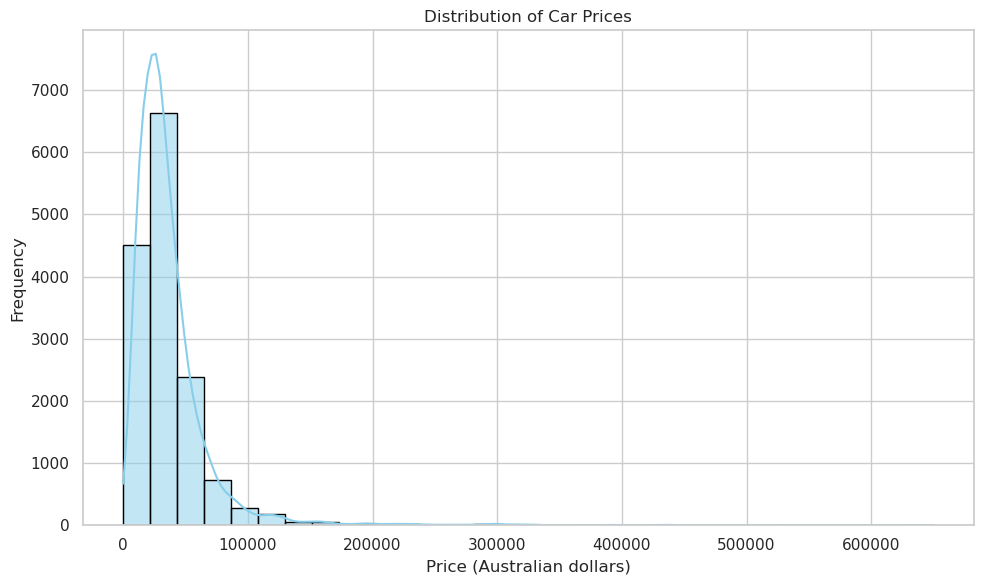

In [1065]:
import seaborn as sns
import matplotlib.pyplot as plt
price_data = df.filter(df['Price'].isNotNull()).select('Price').toPandas()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(price_data['Price'], bins=30, color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Price (Australian dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.tight_layout()
plt.show()

In the context of the price distribution displayed by the histogram, a right-skewed distribution indicates that a larger number of cars have lower prices, with a few cars having significantly higher prices. Specifically, most cars in the dataset tend to have lower prices, possibly concentrated around a specific range (e.g., 10,000 AUD  to 30,000 AUD), while there are only a few cars with higher prices, which could be outliers or luxury vehicles. This skewed distribution suggests an imbalance where the majority of cars fall within a relatively narrow price range, while a smaller number of cars are priced much higher than the average.

### Check Missing Value after Data Preparation

In [1066]:
def count_missing_values(df):
    missing_values_count = {col: df.filter(df[col].isNull() | (df[col] == '')).count() for col in df.columns}
    return missing_values_count

missing_values = count_missing_values(df)

for col, count in missing_values.items():
    print(f"Kolom '{col}': {count} missing values")

Kolom 'Brand': 0 missing values
Kolom 'Year': 0 missing values
Kolom 'Model': 0 missing values
Kolom 'Car/Suv': 0 missing values
Kolom 'Title': 0 missing values
Kolom 'UsedOrNew': 0 missing values
Kolom 'Transmission': 0 missing values
Kolom 'Engine': 0 missing values
Kolom 'DriveType': 0 missing values
Kolom 'FuelType': 0 missing values
Kolom 'FuelConsumption': 0 missing values
Kolom 'Kilometres': 0 missing values
Kolom 'ColourExtInt': 0 missing values
Kolom 'Location': 428 missing values
Kolom 'CylindersinEngine': 0 missing values
Kolom 'BodyType': 0 missing values
Kolom 'Doors': 0 missing values
Kolom 'Seats': 0 missing values
Kolom 'Price': 35 missing values


It's noticeable that the 'Price' column contains 35 null values, requiring handling of these missing values. Meanwhile, the 'Location' column has 428 null values, but since it's decided not to use this column, handling the null values within 'Location' may not be necessary.

In [1067]:
df = df.dropna(subset=['Price'])

### Describe Data after Data Preparation

In [1068]:
df.describe().toPandas()

,summary,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,count,14943,14943,14943,14943,14943,14943,14943,14943,14943,14943,14943,14943,14943,14515,14943,14943,14943,14943,14943
1,mean,None,2016.4090209462624,263.35573770491806,None,None,None,None,None,None,None,None,96764.06069731647,None,None,4.426286555577862,None,4.006089807936827,5.102991367195342,36837.44201298267
2,stddev,None,4.974934252724409,635.4299680870037,None,None,None,None,None,None,None,None,78905.52446411649,None,None,1.116508154548549,None,0.6911900346498875,1.1204555825559022,34411.471404659096
3,min,Abarth,1978,116I,Car,1978 Porsche 911 SC,NEW,Automatic,0 L,4WD,Diesel,0 L / 100 km,0,- / -,"Acacia Ridge, QLD",0,Commercial,2,2,88
4,max,Volvo,2023,ZST,SUV,2023 Volvo XC60 Ultimate B5 Bright Mhev,USED,Manual,"8 cyl, 7.3 L",Rear,Unleaded,9.9 L / 100 km,526162,Yellow / Slate,"Zetland, NSW",12,Wagon,5,22,649880


### Cardinality Check

In [1069]:
from pyspark.sql.functions import approx_count_distinct, col

def cardinality_check(df):
    columns = df.columns
    unique_counts = []
    data_types = []

    for col_name in columns:
        unique_count = df.select(approx_count_distinct(col(col_name))).collect()[0][0]
        unique_counts.append(unique_count)
        data_type = str(df.schema[col_name].dataType)
        data_types.append(data_type)

    cardinality_df = spark.createDataFrame(zip(columns, unique_counts, data_types), ["Column", "Unique_Values_Count", "Data_Type"])
    return cardinality_df

result_df = cardinality_check(df)
result_df.show()

+-----------------+-------------------+-------------+
|           Column|Unique_Values_Count|    Data_Type|
+-----------------+-------------------+-------------+
|            Brand|                 62| StringType()|
|             Year|                 38|IntegerType()|
|            Model|                668| StringType()|
|          Car/Suv|                  2| StringType()|
|            Title|               6938| StringType()|
|        UsedOrNew|                  2| StringType()|
|     Transmission|                  2| StringType()|
|           Engine|                 97| StringType()|
|        DriveType|                  5| StringType()|
|         FuelType|                  5| StringType()|
|  FuelConsumption|                153| StringType()|
|       Kilometres|              13159|IntegerType()|
|     ColourExtInt|                734| StringType()|
|         Location|                632| StringType()|
|CylindersinEngine|                  9|IntegerType()|
|         BodyType|         

### Variables Selection

1. **Brand, Model, Title, Engine, ColourExtInt, Location**: These variables contain a significantly high number of unique string values, which could present challenges during feature encoding, especially when performing tasks like one-hot encoding or label encoding. High cardinality in categorical variables with numerous unique values can lead to an explosion in the number of features, significantly increasing the dimensionality of the dataset. This could potentially impact model performance, increase computational complexity, and introduce noise, making it less feasible for linear regression analysis.

2. **FuelConsumption**: Although FuelConsumption is a string-type variable with a moderate number of unique values, encoding it might not directly translate into meaningful numerical representations for linear regression without additional preprocessing steps. Moreover, its direct inclusion might not offer substantial predictive power without proper transformation.

Given these considerations, dropping these variables helps streamline the dataset, mitigating issues related to dimensionality and complexity. It aims to enhance the model's interpretability, performance, and computational efficiency for linear regression analysis.

In [1070]:
columns_to_drop = ['Brand', 'Model', 'Title', 'Engine', 'FuelConsumption', 'ColourExtInt', 'Location']
df = df.drop(*columns_to_drop)

from pyspark.sql.functions import approx_count_distinct, col

def cardinality_check(df):
    columns = df.columns
    unique_counts = []
    data_types = []

    for col_name in columns:
        unique_count = df.select(approx_count_distinct(col(col_name))).collect()[0][0]
        unique_counts.append(unique_count)
        data_type = str(df.schema[col_name].dataType)
        data_types.append(data_type)

    cardinality_df = spark.createDataFrame(zip(columns, unique_counts, data_types), ["Column", "Unique_Values_Count", "Data_Type"])
    return cardinality_df

result_df = cardinality_check(df)
result_df.show()

+-----------------+-------------------+-------------+
|           Column|Unique_Values_Count|    Data_Type|
+-----------------+-------------------+-------------+
|             Year|                 38|IntegerType()|
|          Car/Suv|                  2| StringType()|
|        UsedOrNew|                  2| StringType()|
|     Transmission|                  2| StringType()|
|        DriveType|                  5| StringType()|
|         FuelType|                  5| StringType()|
|       Kilometres|              13159|IntegerType()|
|CylindersinEngine|                  9|IntegerType()|
|         BodyType|                 10| StringType()|
|            Doors|                  4|IntegerType()|
|            Seats|                 13|IntegerType()|
|            Price|               3333|IntegerType()|
+-----------------+-------------------+-------------+



In [1071]:
df.show(10)

+----+-------+---------+------------+---------+--------+----------+-----------------+----------+-----+-----+------+
|Year|Car/Suv|UsedOrNew|Transmission|DriveType|FuelType|Kilometres|CylindersinEngine|  BodyType|Doors|Seats| Price|
+----+-------+---------+------------+---------+--------+----------+-----------------+----------+-----+-----+------+
|2022|    Car|      NEW|   Automatic|      AWD|  Diesel|      5595|                4|       SUV|    4|    7| 51990|
|2022|    Car|     USED|   Automatic|    Front| Premium|        16|                4| Hatchback|    5|    5| 19990|
|2022|    Car|     USED|   Automatic|     Rear| Premium|      8472|                4|     Coupe|    2|    4|108988|
|2011|    Car|     USED|   Automatic|     Rear| Premium|    136517|                8|     Coupe|    2|    4| 32990|
|2022|    SUV|     USED|   Automatic|    Front|Unleaded|      1035|                4|       SUV|    4|    5| 34990|
|2017|    SUV|     USED|   Automatic|      AWD|  Diesel|     67662|     

### One-Hot Encoding for Categorical Variables

In [1072]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
categorical_cols = ['Car/Suv', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType']
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_cols]

### Feature Scaling for Numerical Variables

In [1073]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
numerical_cols = ['Year', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats']
assembler = VectorAssembler(inputCols=[f"{col}_encoded" for col in categorical_cols] + numerical_cols,
                            outputCol="features")
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

### Pipelines for Transformation Processes

In [1074]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler])
model_data = pipeline.fit(df).transform(df)

### Model Validation using RandomSplit

In [1075]:
train_data, test_data = model_data.randomSplit([0.8, 0.2], seed=42)
train_lr_data = train_data.select("Price", "scaled_features")
test_lr_data = test_data.select("Price", "scaled_features")

### Linear Regression Model Training

In [1076]:
lr = LinearRegression(featuresCol='scaled_features', labelCol='Price')
lr_model = lr.fit(train_lr_data)

### Model Evaluation on Test Data

In [1077]:
predictions = lr_model.transform(test_lr_data)

### Root Mean Squared Error (RMSE)

In [1078]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

Root Mean Squared Error (RMSE) on test data: 22579.488269054014


The obtained RMSE value is approximately 22,579.5. This value represents the average difference between the model's predicted values and the actual Price values in the test dataset. In this case, RMSE is a measure of how much the model's predictions deviate from the actual values. A lower RMSE indicates better model performance.

### Mean Absolute Error (MAE)

In [1079]:
evaluator_mae = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='mae')
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data: {mae}")

Mean Absolute Error (MAE) on test data: 12217.53646857757


The MAE value is around 12,217.5. This metric measures the average of the absolute differences between the predicted values and the actual Price values. MAE depicts the average magnitude of errors between the model's predictions and the actual values.

### R-squared (R²) or Coefficient of Determination

In [1080]:
evaluator_r2 = RegressionEvaluator(labelCol='Price', predictionCol='prediction', metricName='r2')
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared (R²) on test data: {r2}")

R-squared (R²) on test data: 0.5379506608150186


The R-squared value is approximately 0.538. R-squared indicates how well the variability of the target variable (Price) can be explained by the model. R-squared values range from 0 to 1, where values closer to 1 indicate better model performance in explaining data variability. A value of 0.538 suggests that the model can explain around 53.8% of the variability in the target variable.

# Conclusion

**Reasons for Suboptimal Linear Regression Performance:**
1. Non-linearity in Data: Linear Regression assumes a linear relationship between predictors and the target variable. However, in complex datasets, especially those with nonlinear relationships, Linear Regression may struggle to capture intricate patterns.
2. High Variability in Price: The wide range of Price values, from 88 AUD to 649880 AUD, might contain non-linear relationships or interactions that Linear Regression cannot effectively capture.
3. Unaccounted Features: Linear Regression assumes a linear relationship between predictors and the target, neglecting potential interactions, non-linearities, or complex feature relationships that other models like Random Forest or Gradient Boosting might better handle.

**Potential for Other Models:**
Models like Random Forest, Gradient Boosting, or Neural Networks might yield better results for this dataset due to their capability to handle non-linear relationships, interactions among features, and complex data patterns. These models are more flexible and adaptive, allowing them to capture intricate relationships that Linear Regression might miss.

In summary, considering the limitations of linear models in capturing complex relationships and the non-linearity in the dataset, employing more sophisticated models could potentially enhance predictive accuracy and better handle the complexities present in the data.